# Programming assignment 4: Linear regression

In [8]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## Your task

In this notebook code skeleton for performing linear regression is given. 
Your task is to complete the functions where required. 
You are only allowed to use built-in Python functions, as well as any `numpy` functions. No other libraries / imports are allowed.

## Load and preprocess the data

I this assignment we will work with the Boston Housing Dataset.
The data consists of 506 samples. Each sample represents a district in the city of Boston and has 13 features, such as crime rate or taxation level. The regression target is the median house price in the given district (in $1000's).

More details can be found here: http://lib.stat.cmu.edu/datasets/boston

In [2]:
X , y = load_boston(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
# (Recall slide #7 from the lecture)
X = np.hstack([np.ones([X.shape[0], 1]), X])
# From now on, D refers to the number of features in the AUGMENTED dataset (i.e. including the dummy '1' feature for the absorbed bias term)

# Split into train and test
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

## Task 1: Fit standard linear regression

In [3]:
def fit_least_squares(X, y):
    """Fit ordinary least squares model to the data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Regression targets.
        
    Returns
    -------
    w : array, shape [D]
        Optimal regression coefficients (w[0] is the bias term).
        
    """
    w = np.linalg.lstsq(X, y)[0]
    return w

## Task 2: Fit ridge regression

In [4]:
def fit_ridge(X, y, reg_strength):
    """Fit ridge regression model to the data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Regression targets.
    reg_strength : float
        L2 regularization strength (denoted by lambda in the lecture)
        
    Returns
    -------
    w : array, shape [D]
        Optimal regression coefficients (w[0] is the bias term).
    
    """
    w = np.linalg.inv(X.T.dot(X) + reg_strength*np.eye(X.shape[1])).dot(X.T).dot(y)
    return w

## Task 3: Generate predictions for new data

In [5]:
def predict_linear_model(X, w):
    """Generate predictions for the given samples.
    
    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    w : array, shape [D]
        Regression coefficients.
        
    Returns
    -------
    y_pred : array, shape [N]
        Predicted regression targets for the input data.
        
    """
    return w.dot(X.T)

## Task 4: Mean squared error

In [6]:
def mean_squared_error(y_true, y_pred):
    """Compute mean squared error between true and predicted regression targets.
    
    Reference: `https://en.wikipedia.org/wiki/Mean_squared_error`
    
    Parameters
    ----------
    y_true : array
        True regression targets.
    y_pred : array
        Predicted regression targets.
        
    Returns
    -------
    mse : float
        Mean squared error.
        
    """
    return np.sum((y_true - y_pred)**2)/y_true.size

## Compare the two models

The reference implementation produces 
* MSE for Least squares $\approx$ **23.98**
* MSE for Ridge regression $\approx$ **21.05**

You results might be slightly (i.e. $\pm 1\%$) different from the reference soultion due to numerical reasons.

MSE for Least squares = 23.984307611784356
MSE for Ridge regression = 21.051487033772197


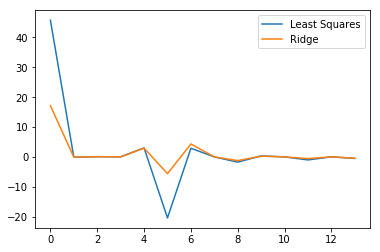

In [10]:
# Load the data
np.random.seed(1234)
X , y = load_boston(return_X_y=True)
X = np.hstack([np.ones([X.shape[0], 1]), X])
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# Ordinary least squares regression
w_ls = fit_least_squares(X_train, y_train)
y_pred_ls = predict_linear_model(X_test, w_ls)
mse_ls = mean_squared_error(y_test, y_pred_ls)
print('MSE for Least squares = {0}'.format(mse_ls))

# Ridge regression
reg_strength = 1
w_ridge = fit_ridge(X_train, y_train, reg_strength)
y_pred_ridge = predict_linear_model(X_test, w_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('MSE for Ridge regression = {0}'.format(mse_ridge))

plt.plot(w_ls, label='Least Squares')
plt.plot(w_ridge, label='Ridge')
plt.legend()
plt.show()